In [2]:
!pip install nltk
!pip install Wordcloud

In [3]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

In [4]:
file_name = "Glencairn_Description_2021,2.txt"  # in R here + data inaugural_speech...

my_file = open(file_name, encoding="utf8") # open the file. 
description = my_file.read() # read content of it and put them in a variable
my_file.close() # close the file

# after that you have access to that file as text in the speech variable you created
print("number of characters:", len(description))
print("-------------------------------------------------------------------------------------------------")
print(description[:20000]) # first 500 words

number of characters: 247930
-------------------------------------------------------------------------------------------------
Hot Products glencairn crystal whiskey glass With New Currents
Newly Released glencairn whiskey glasses with Reply very quickly
Dropship glencairn glass whiskey with good quality
Whisky Nosing and Tasting Glass Clear Hi Quality Bottle Whisky Glass
6oz Crystal Official Whiskey Glass Set of 6
Whisky Nosing and Tasting Glass Clear Hi Quality Bottle Whisky Glass
Europe whisky glass cups sweet wine cup glass creative crystal glass scented goblet
6oz Crystal Whisky Glasses 175ml
elegant glass cup 75 ml luxury brand tumbler cups mini wine glasses a cup of tea
elegant glass cup 75 ml luxury brand tumbler cups mini wine glasses a cup of tea
elegant glass cup 75 ml luxury brand tumbler cups mini wine glasses a cup of tea
elegant glass cup 75 ml luxury brand tumbler cups mini wine glasses a cup of tea
Elegant glass cup 75 ml luxury brand tumbler cups mini wine glasses a c

In [5]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
description_tokens = word_tokenize(description)
lower_description_tokens = [word.lower() for word in description_tokens] 
print(lower_description_tokens[0:50])

['hot', 'products', 'glencairn', 'crystal', 'whiskey', 'glass', 'with', 'new', 'currents', 'newly', 'released', 'glencairn', 'whiskey', 'glasses', 'with', 'reply', 'very', 'quickly', 'dropship', 'glencairn', 'glass', 'whiskey', 'with', 'good', 'quality', 'whisky', 'nosing', 'and', 'tasting', 'glass', 'clear', 'hi', 'quality', 'bottle', 'whisky', 'glass', '6oz', 'crystal', 'official', 'whiskey', 'glass', 'set', 'of', '6', 'whisky', 'nosing', 'and', 'tasting', 'glass', 'clear']


In [7]:
from nltk.text import Text

text_of_the_description = Text(lower_description_tokens)
print("LIEWOOD", text_of_the_description.concordance("LIEWOOD", lines = 1))
print('silicone', text_of_the_description.concordance('silicone', lines = 1))
print('6Pcs Beach Toy Set', text_of_the_description.concordance('6Pcs Beach Toy Set', lines = 1))
print('SILICONE BUCKET', text_of_the_description.concordance('SILICONE BUCKET', lines = 1))
print('beach', text_of_the_description.concordance('beach', lines = 1))
print('丹麦', text_of_the_description.concordance('丹麦', lines = 1))
print('ins原单', text_of_the_description.concordance('ins原单', lines = 1))
print('organic', text_of_the_description.concordance('organic', lines = 1))
print('sand', text_of_the_description.concordance('sand', lines = 1))

no matches
LIEWOOD None
Displaying 1 of 2 matches:
tive bear champagne bubble stopper silicone wine silicone wine stopper interna
silicone None
no matches
6Pcs Beach Toy Set None
no matches
SILICONE BUCKET None
Displaying 1 of 1 matches:
4 '' french paper speckletone madero beach 100 # cover , vintage inspired glenc
beach None
no matches
丹麦 None
no matches
ins原单 None
no matches
organic None
no matches
sand None


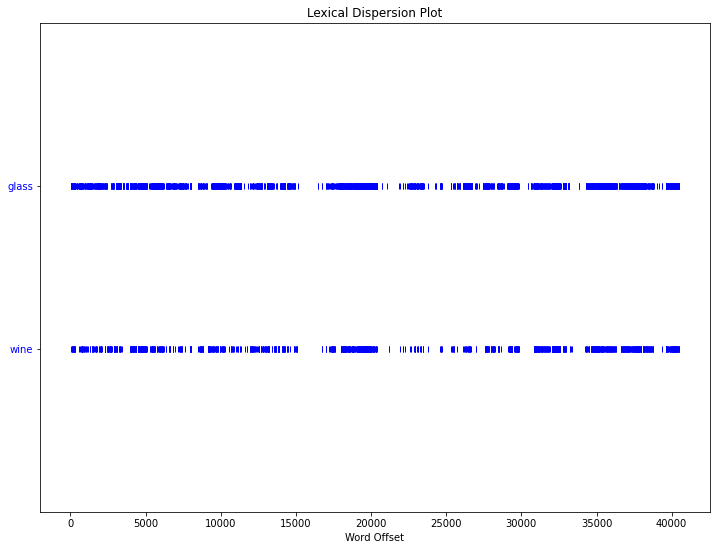

In [8]:
from nltk.draw.dispersion import dispersion_plot

plt.figure(figsize=(12, 9))

targets =['glass','wine']
dispersion_plot(text_of_the_description, targets, ignore_case=True, title='Lexical Dispersion Plot')

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#let's have a look what are the words usually discarded:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,', "''"]
individual_letters = list(string.ascii_lowercase)
some_more_words_to_remove = [",","-",")"]


[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + extra_punctuation_to_remove + individual_letters + some_more_words_to_remove)

filtered_text = [word 
                 for word in text_of_the_description 
                 if not word in remove_these]

# note: above broken-down 3-line version could be a one-liner (see below). 
# it's up to you, which format you prefer. above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)

In [21]:
from nltk.probability import FreqDist

fdist_filtered.most_common(100)

[('glass', 2573),
 ('wine', 1380),
 ('cup', 1222),
 ('whiskey', 1167),
 ('crystal', 859),
 ('whisky', 852),
 ('glasses', 742),
 ('tasting', 739),
 ('set', 724),
 ('de', 720),
 ('tulip', 390),
 ('color', 347),
 ('glencairn', 278),
 ('bar', 270),
 ('beer', 210),
 ('bourbon', 194),
 ('vino', 194),
 ('verre', 191),
 ('drinking', 190),
 ('clear', 184),
 ('professional', 176),
 ('iso', 174),
 ('scotch', 171),
 ('glassware', 171),
 ('fragrance-smelling', 165),
 ('brandy', 160),
 ('sweet', 154),
 ('cups', 149),
 ('cristal', 143),
 ('perfect', 141),
 ('cocktail', 137),
 ('red', 134),
 ('liquor', 128),
 ('cocktails', 127),
 ('goblet', 125),
 ('6.56', 125),
 ('à', 125),
 ('para', 124),
 ('lead-free', 122),
 ('di', 122),
 ('drink', 120),
 ('transparent', 117),
 ('ml', 114),
 ('oz', 114),
 ('scent', 103),
 ('tumblers', 103),
 ('vaso', 100),
 ('size', 99),
 ('hand', 97),
 ('smelling', 96),
 ('copa', 93),
 ('white', 91),
 ('party', 88),
 ('foreign', 85),
 ('water', 83),
 ('juice', 83),
 ('vidrio', 82

In [22]:
# bigram_measures = BigramAssocMeasures()
# finder = BigramCollocationFinder.from_words(text_of_the_description, 5)
word_fd = nltk.FreqDist(filtered_text)
bigram_fd = nltk.FreqDist(nltk.bigrams(filtered_text))
finder = BigramCollocationFinder(word_fd, bigram_fd)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [23]:
sorted(finder.nbest(bigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('wine', 'glass'), 457),
 (('whiskey', 'glass'), 360),
 (('tasting', 'glass'), 296),
 (('tasting', 'cup'), 252),
 (('glass', 'whiskey'), 249),
 (('crystal', 'glass'), 246),
 (('wine', 'glasses'), 193),
 (('whisky', 'glass'), 182),
 (('whiskey', 'glasses'), 169),
 (('crystal', 'whiskey'), 167),
 (('glass', 'set'), 167),
 (('fragrance-smelling', 'cup'), 159),
 (('glasses', 'set'), 129),
 (('glass', 'tulip'), 126),
 (('red', 'wine'), 121),
 (('sweet', 'wine'), 120),
 (('de', 'whisky'), 119),
 (('glass', 'tasting'), 119),
 (('wine', 'cup'), 118),
 (('cup', 'whiskey'), 109)]

In [24]:
finder = TrigramCollocationFinder.from_words(filtered_text)
scored = finder.score_ngrams(trigram_measures.raw_freq)

In [25]:
sorted(finder.nbest(trigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('crystal', 'whiskey', 'glass'), 100),
 (('glass', 'tasting', 'glass'), 89),
 (('crystal', 'glass', 'whiskey'), 66),
 (('dishwasher', 'safe', 'perfect'), 61),
 (('fragrance-smelling', 'cup', 'whisky'), 61),
 (('perfect', 'kitchen', 'bar'), 60),
 (('safe', 'perfect', 'kitchen'), 60),
 (('kitchen', 'bar', 'set'), 59),
 (('whiskey', 'glasses', 'set'), 59),
 (('drinking', 'glass', 'water'), 55),
 (('glass', 'water', 'juice'), 55),
 (('water', 'juice', 'cocktails'), 55),
 (('6.56', 'oz', 'drinking'), 53),
 (('oz', 'drinking', 'glass'), 53),
 (('juice', 'cocktails', 'beverages'), 52),
 (('whiskey', 'tasting', 'glass'), 51),
 (('wine', 'glass', 'tasting'), 51),
 (('glass', 'whiskey', 'glasses'), 47),
 (('whiskey', 'glass', 'whiskey'), 47),
 (('glass', 'whiskey', 'glass'), 46)]

[('glass', 2573), ('wine', 1380), ('cup', 1222), ('whiskey', 1167), ('crystal', 859), ('whisky', 852), ('glasses', 742), ('tasting', 739), ('set', 724), ('de', 720), ('tulip', 390), ('color', 347), ('glencairn', 278), ('bar', 270), ('beer', 210), ('bourbon', 194), ('vino', 194), ('verre', 191), ('drinking', 190), ('clear', 184), ('professional', 176), ('iso', 174), ('scotch', 171), ('glassware', 171), ('fragrance-smelling', 165), ('brandy', 160), ('sweet', 154), ('cups', 149), ('cristal', 143), ('perfect', 141)]


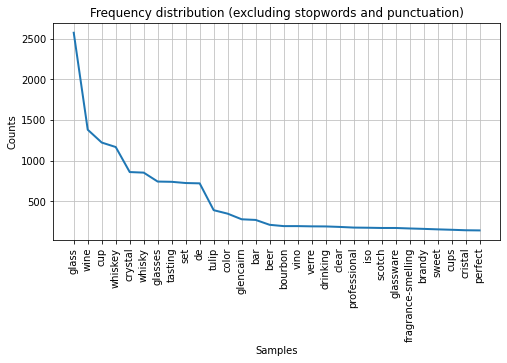

<AxesSubplot:title={'center':'Frequency distribution (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [27]:
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

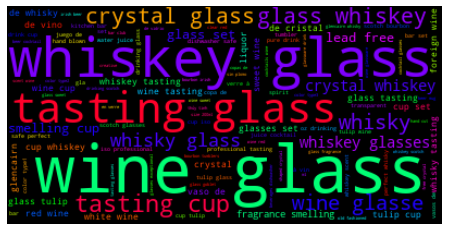

In [28]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(text_of_the_description)) # generate function?
plt.rcParams["figure.figsize"] = (8,4)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()